# Task - 2 User Engagement Analysis

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

Extract and Load the xDR Dataset

In [2]:
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# import load_data from scripts module
from db_conn import load_data

xdr_df = load_data()

✅ Database Connected Successfully!


In [4]:
# Explre the first ten rows
xdr_df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [5]:
# Import the UserEngagementAnalysis class from the user_engagement_analysis module
from user_engagement_analysis import UserEngagementAnalysis

# Create an instance of the UserEngagementAnalysis class with the dataset
analysis = UserEngagementAnalysis(xdr_df)

# Define application traffic columns for analysis
applications = {
    "YouTube": ["Youtube DL (Bytes)", "Youtube UL (Bytes)"],
    "Netflix": ["Netflix DL (Bytes)", "Netflix UL (Bytes)"],
    "Gaming": ["Gaming DL (Bytes)", "Gaming UL (Bytes)"],
    "Other": ["Other DL (Bytes)", "Other UL (Bytes)"],
}

# Aggregate metrics for user engagement analysis
analysis.aggregate_metrics()
print("\n" + "-" * 100 + "\n")
# Display the first few rows of the aggregated metrics
print("Aggregated metrics head:\n", analysis.metrics.head())

print("\n" + "-" * 100 + "\n")

# Print statement to confirm that the metrics have been aggregated successfully
print("User engagement metrics aggregated successfully.")


----------------------------------------------------------------------------------------------------

Aggregated metrics head:
    MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.360100e+10                116720.0            8.426375e+08   
1   3.360100e+10                181230.0            1.207552e+08   
2   3.360100e+10                134969.0            5.566597e+08   
3   3.360101e+10                 49878.0            4.019932e+08   
4   3.360101e+10                 37104.0            1.363130e+09   

   total_upload_traffic  sessions_frequency  
0            36053108.0                   1  
1            36104459.0                   1  
2            39306820.0                   1  
3            20327526.0                   1  
4            94280527.0                   2  

----------------------------------------------------------------------------------------------------

User engagement metrics aggregated successfully.


In [6]:
# Report top customers based on user engagement metrics
top_customers = analysis.report_top_customers()
print("\n" + "-" * 100 + "\n")
# Print the top 10 customers by various metrics
print("Top 10 Customers by Sessions Frequency:\n", top_customers[0])
print("Top 10 Customers by Session Duration:\n", top_customers[1])
print("Top 10 Customers by Download Traffic:\n", top_customers[2])
print("Top 10 Customers by Upload Traffic:\n", top_customers[3])

# Print statement to confirm that the top customer report has been generated successfully
print("Top customer report generated successfully.")


----------------------------------------------------------------------------------------------------

Top 10 Customers by Sessions Frequency:
        MSISDN/Number  total_session_duration  total_download_traffic  \
13526   3.362632e+10               8791927.0            7.301517e+09   
6437    3.361489e+10               9966898.0            8.156743e+09   
13180   3.362578e+10              18553754.0            7.770043e+09   
37052   3.365973e+10               4035428.0            7.081602e+09   
76363   3.367588e+10               4865947.0            7.309542e+09   
92923   3.376054e+10               9279434.0            7.811295e+09   
65118   3.366716e+10               8744914.0            5.052068e+09   
666     3.360313e+10               6287761.0            4.540607e+09   
1279    3.360452e+10               5207990.0            5.096079e+09   
13994   3.362708e+10               4703516.0            5.309479e+09   

       total_upload_traffic  sessions_frequency  
13526        

In [7]:
# Normalize and cluster the user engagement metrics into specified number of clusters
analysis.normalize_and_cluster(n_clusters=3)
print("\n" + "-" * 100 + "\n")
# Display the first few rows of the normalized and clustered metrics
print("Normalized and clustered metrics head:\n", analysis.metrics.head())
print("\n" + "-" * 100 + "\n")
# Print statement to confirm that normalization and clustering have been completed successfully
print("Normalization and clustering completed successfully.")


----------------------------------------------------------------------------------------------------

Normalized and clustered metrics head:
    MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.360100e+10                116720.0            8.426375e+08   
1   3.360100e+10                181230.0            1.207552e+08   
2   3.360100e+10                134969.0            5.566597e+08   
3   3.360101e+10                 49878.0            4.019932e+08   
4   3.360101e+10                 37104.0            1.363130e+09   

   total_upload_traffic  sessions_frequency  cluster  
0            36053108.0                   1        1  
1            36104459.0                   1        1  
2            39306820.0                   1        1  
3            20327526.0                   1        1  
4            94280527.0                   2        0  

----------------------------------------------------------------------------------------------------

Normalization a

In [8]:
# Generate a summary of the clusters created during analysis

cluster_summary = analysis.cluster_summary()
print("\n" + "-" * 100 + "\n")
# Display the cluster summary
print("Cluster Summary:\n", cluster_summary)
print("\n" + "-" * 100 + "\n")

# Print statement to confirm that the cluster summary has been generated successfully
print("Cluster summary generated successfully.")


----------------------------------------------------------------------------------------------------

Cluster Summary:
   cluster sessions_frequency                      total_session_duration  \
                         min max      mean    sum                    min   
0       0                  1   4  2.164352  53308                18235.0   
1       1                  1   2  1.011050  79420                 7142.0   
2       2                  2  18  4.411268  16207                66594.0   

                                           total_download_traffic  \
          max           mean           sum                    min   
0   1573420.0  209733.014738  5.165724e+09             65270746.0   
1   1042254.0  103284.036905  8.113168e+09              8827082.0   
2  18553754.0  636893.259662  2.339946e+09            404647470.0   

                                            total_upload_traffic               \
            max          mean           sum                  min       

In [9]:
# Aggregate traffic per application based on defined application traffic columns
app_total_traffic, top_10_engaged_per_app = analysis.aggregate_traffic_per_application(
    applications=applications
)
print("\n" + "-" * 100 + "\n")  
# Display total traffic per application
print("Total Traffic per Application:\n", app_total_traffic)
print("\n" + "-" * 100 + "\n")  

# Display top 10 engaged users per application
print("Top 10 Engaged Users per Application:\n", top_10_engaged_per_app)
print("\n" + "-" * 100 + "\n")  

# Print statement to confirm that traffic aggregation has been completed successfully
print("Traffic aggregation per application completed successfully.")


----------------------------------------------------------------------------------------------------

Total Traffic per Application:
   application  download_bytes  upload_bytes   total_bytes
0      Gaming    6.285438e+13  1.234535e+12  6.408892e+13
1     Netflix    1.731750e+12  1.638310e+12  3.370060e+12
2       Other    6.272357e+13  1.230678e+12  6.395425e+13
3     YouTube    1.732628e+12  1.639576e+12  3.372204e+12

----------------------------------------------------------------------------------------------------

Top 10 Engaged Users per Application:
           MSISDN  download_bytes  upload_bytes application   total_bytes
0   3.361489e+10    7.622035e+09   127396833.0      Gaming  7.749432e+09
1   3.376054e+10    7.316364e+09   144681056.0      Gaming  7.461045e+09
2   3.362578e+10    7.171884e+09   154789688.0      Gaming  7.326673e+09
3   3.367588e+10    6.863307e+09   107260559.0      Gaming  6.970568e+09
4   3.362632e+10    6.745734e+09   141838597.0      Gaming  6.887572

d:\KAIM\KAIM-week-3\TellCo-Analysis\scripts\user_engagement_analysis.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


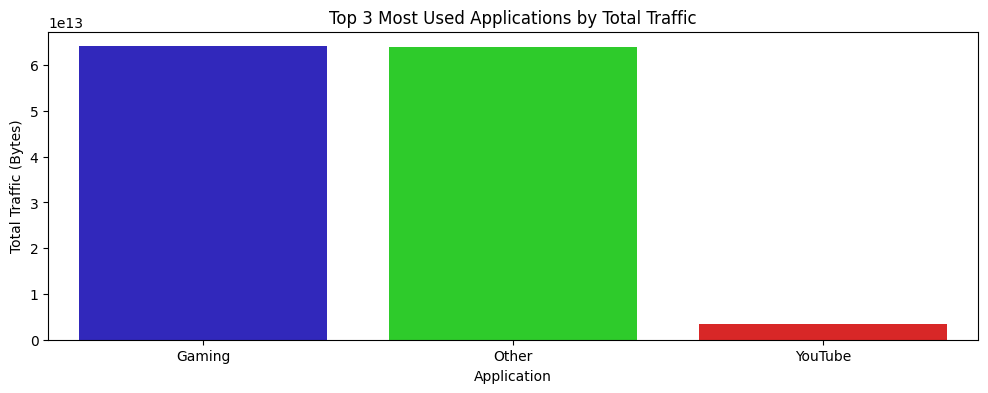

In [14]:
# Plot top applications 
custom_colors = [ "#1c0fd4","#14e610", "#f50a0a"]
top_3_apps = app_total_traffic.nlargest(3, 'total_bytes')
analysis.plot_top_applications(top_3_apps,colors=custom_colors)

Running elbow method to determine optimal number of clusters...


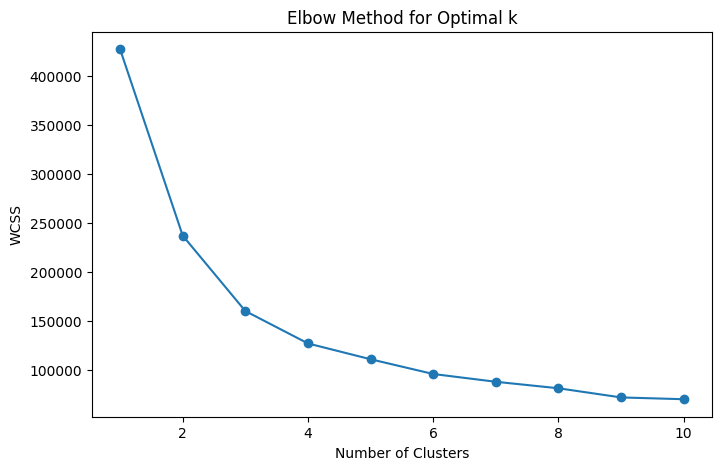

Elbow method completed successfully.


In [19]:
# Elbow method for determining the optimal number of clusters
print("Running elbow method to determine optimal number of clusters...")
analysis.elbow_method()

# Print statement to confirm that the elbow method has been executed successfully
print("Elbow method completed successfully.")